# Exploration 2 #
* In this I'm going to start with mixing the pop_0_4 and pop_5_9 and pop_10_14.
* Then, I'm going to get the adult and child population.
* After that I'm going to find the amount of adults with literary skills.
* Along with the number of people who have access to the internet.

* I will then graph these numbers to see if anything follows a trend.

* Then I will find the approximate gpd with the income of each person times the population.
* After that I will find the approximate amount of money spent on research and development.


In [1]:
ls ../csv

co2_pp.csv
energy.csv
energy_production_total.csv
gdp.csv
hdi.csv
hdi_human_development_index.csv
hte.csv
income_per_person_gdppercapita_ppp_inflation_adjusted.csv
internet_users.csv
ley.csv
literacy_15_above.csv
pop_0_4.csv
pop_10_14.csv
pop_5_9.csv
pop_tot.csv
rd_gpd_per.csv


In [2]:
# population
pop_file = 'pop_tot.csv'
# percent of population
pop_0_4_file = 'pop_0_4.csv'
pop_5_9_file = 'pop_5_9.csv'
pop_10_14_file = 'pop_10_14.csv'
lit_file = 'literacy_15_above.csv'
net_file = 'internet_users.csv'
#gpd
gdp_file = 'gdp.csv'
# percent of gpd
rd_file = 'rd_gpd_per.csv'

# flat age
ley_file = 'ley.csv'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pop4_df = pd.read_csv('../csv/'+pop_0_4_file)
pop9_df = pd.read_csv('../csv/'+pop_5_9_file)
pop14_df= pd.read_csv('../csv/'+pop_10_14_file)


In [5]:
pop4_df.set_index('country', inplace=True)

In [6]:
pop9_df.set_index('country', inplace=True)
pop14_df.set_index('country', inplace=True)

In [7]:
pop4_df = pop4_df.transpose().rolling(5,1).mean()

In [8]:
pop9_df = pop9_df.transpose().rolling(5,1).mean()
pop14_df = pop14_df.transpose().rolling(5,1).mean()

In [9]:
child_pop_df = pop4_df + pop9_df + pop14_df
child_pop_df.head()
child_pop_df.index = pd.to_datetime(child_pop_df.index)

In [10]:
pop_df = pd.read_csv('../csv/'+pop_file)

In [11]:
pop_df = pop_df.set_index('country').transpose().rolling(5,1).mean()
pop_df.index= pd.to_datetime(pop_df.index)

In [12]:
child_pop_df = (child_pop_df /100) * pop_df

In [13]:
adult_pop_df = pop_df - child_pop_df
adult_pop_df.index = pd.to_datetime(adult_pop_df.index)

In [14]:
adult_pop_df.dropna(how='all', axis=1, inplace=True)
adult_pop_df.dropna(how='all', inplace=True)
child_pop_df.dropna(how='all', axis=1, inplace=True)
child_pop_df.dropna(how='all', inplace=True)
pop_df = child_pop_df+adult_pop_df

In [15]:
lit_adult_df = pd.read_csv('../csv/'+lit_file)

In [16]:
lit_adult_df = lit_adult_df.set_index('country').transpose().rolling(37,1, win_type='gaussian').mean(std=8)

In [17]:
lit_adult_df.fillna(method='backfill', inplace=True)


In [18]:
net_user_df = pd.read_csv('../csv/'+net_file)

In [19]:
net_user_df = net_user_df.set_index('country').transpose().rolling(5,1,win_type='gaussian').mean(std=5)
net_user_df.index = pd.to_datetime(net_user_df.index)

In [20]:
gdp_df = pd.read_csv('../csv/'+gdp_file)

In [21]:
gdp_df.set_index('year',inplace=True)

In [22]:
gdp_df.index = pd.to_datetime(gdp_df.index)

In [23]:
gdp_df =gdp_df.rolling(5,1,win_type='gaussian').mean(std=5)

In [24]:
gdp_df = gdp_df * adult_pop_df

In [25]:
gdp_df.dropna(how='all',inplace=True)
gdp_df.dropna(how='all',axis=1, inplace=True)

In [26]:
gdp_df.mean().mean(), pop_df.mean().mean()

(304610924873.2141, 40655425.8227757)

In [27]:
rd_df = pd.read_csv('../csv/'+rd_file)

In [28]:
rd_df = rd_df.set_index('country').transpose()

In [29]:
rd_std = rd_df.describe().transpose()['std'].mean()

In [30]:
rd_df = rd_df.rolling(5,1,win_type='gaussian').mean(std=rd_std)

In [31]:
rd_df = rd_df/100

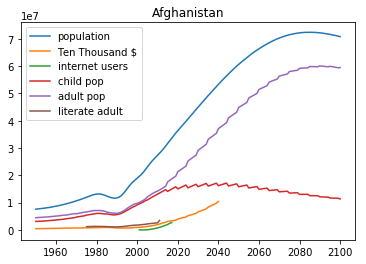

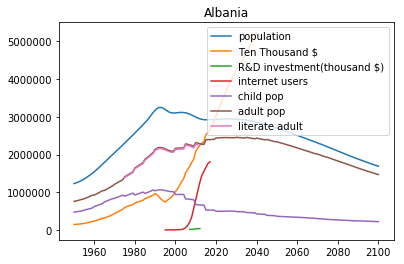

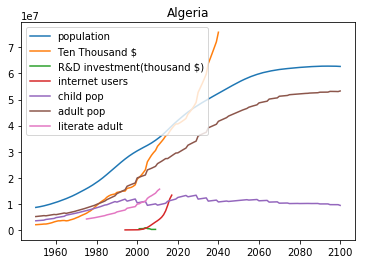

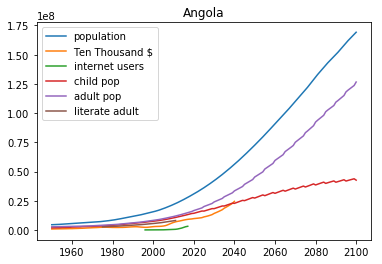

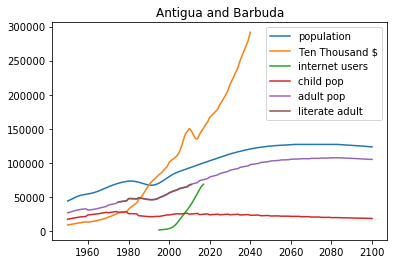

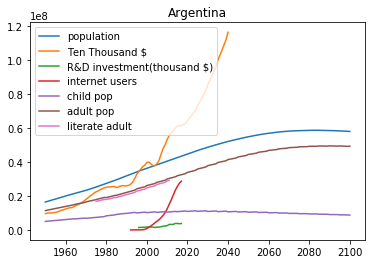

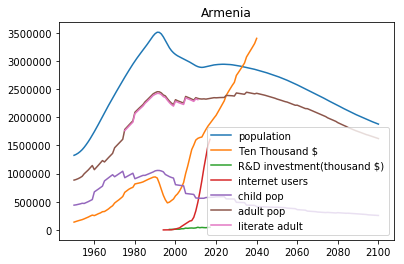

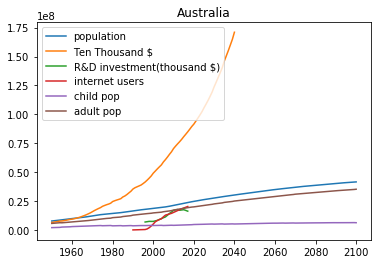

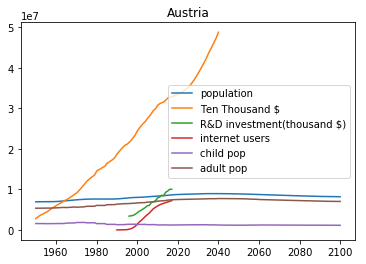

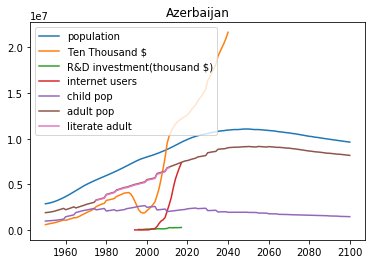

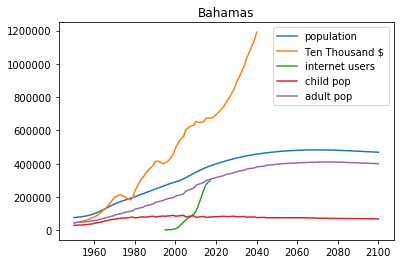

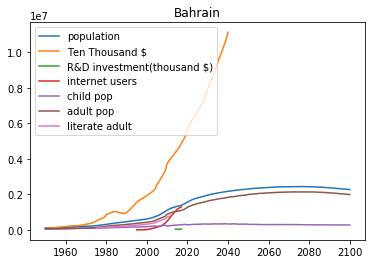

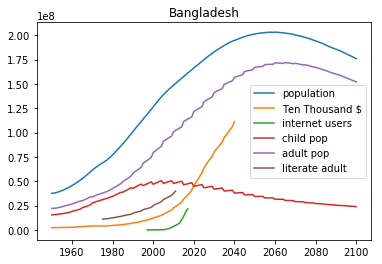

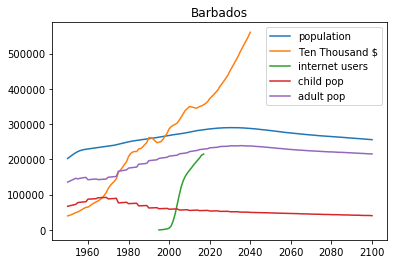

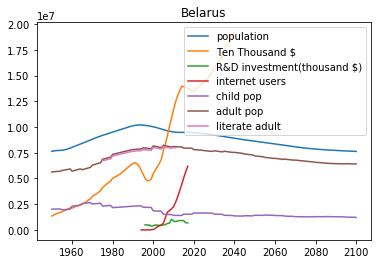

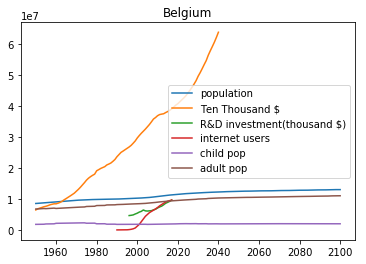

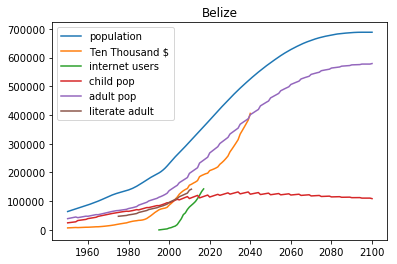

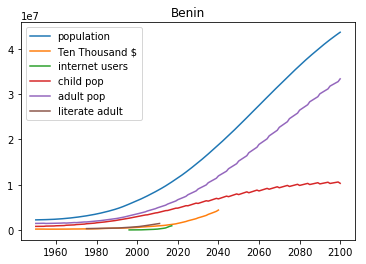

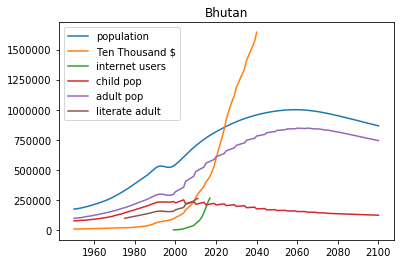

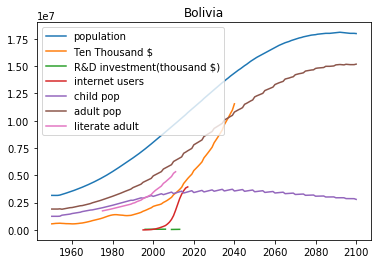

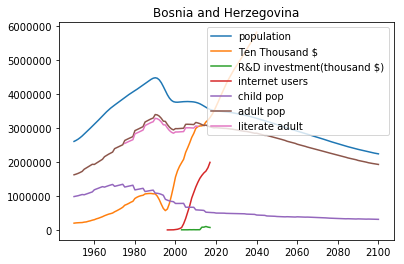

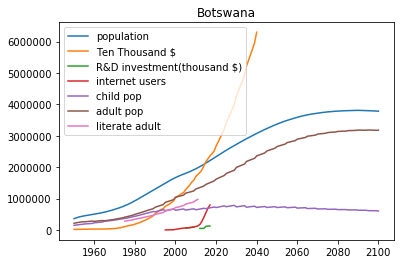

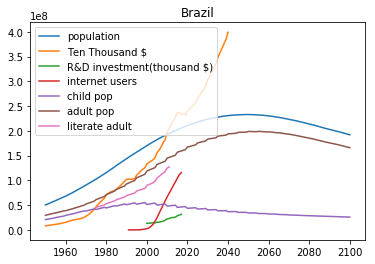

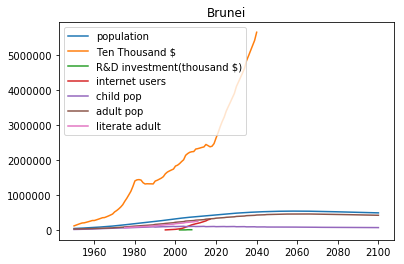

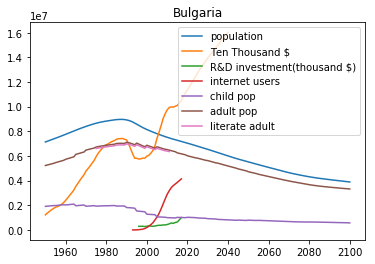

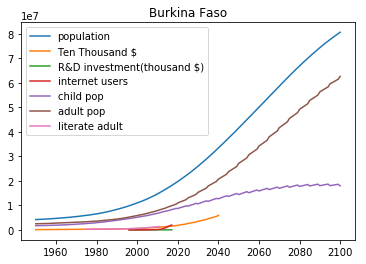

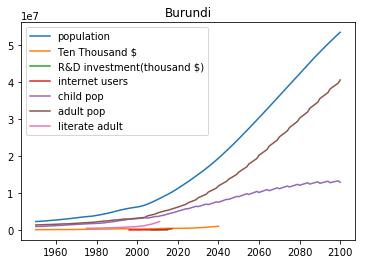

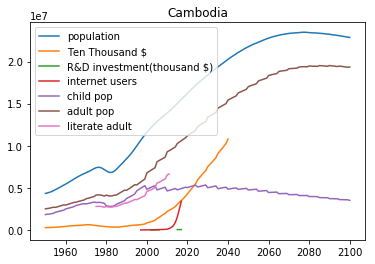

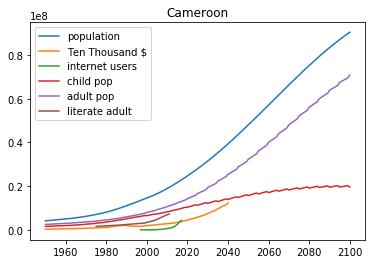

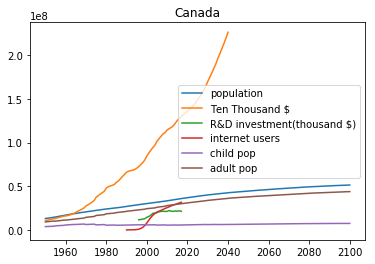

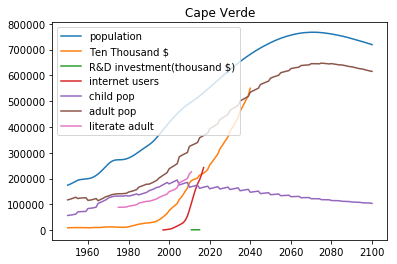

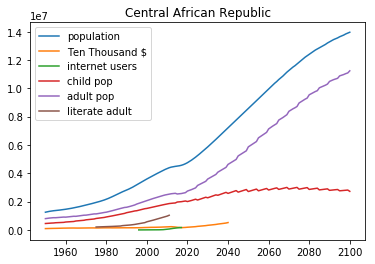

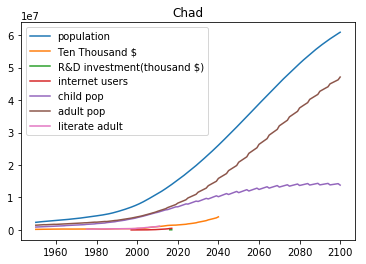

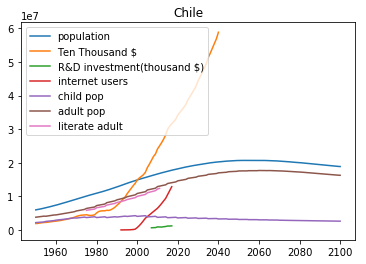

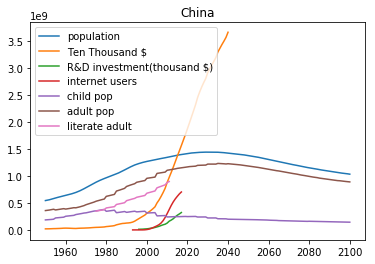

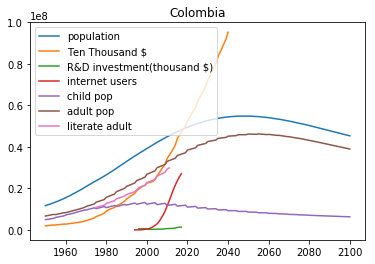

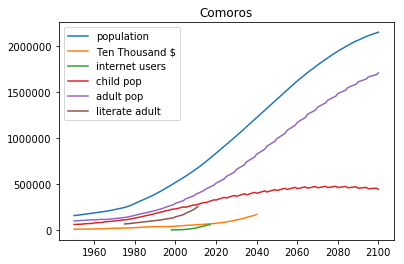

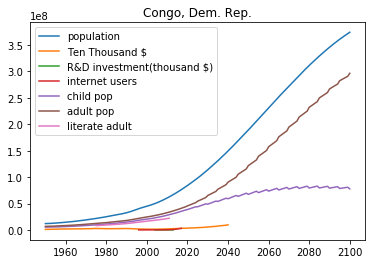

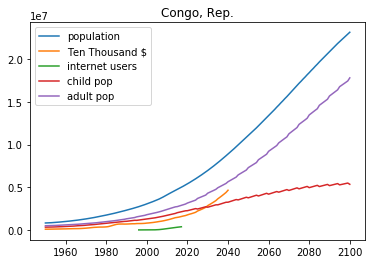

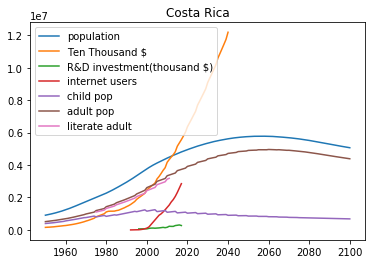

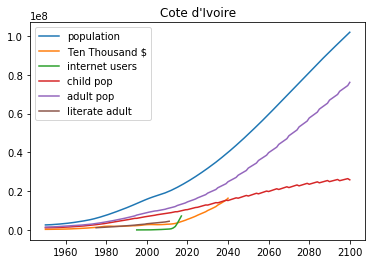

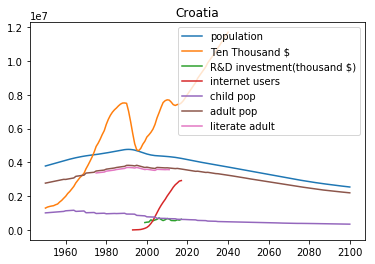

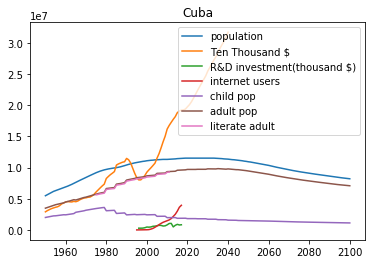

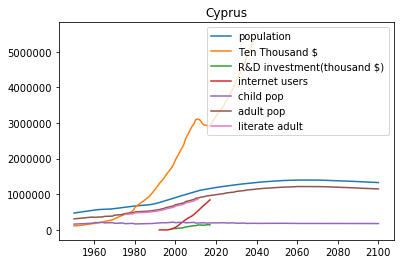

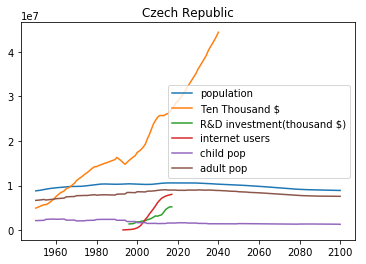

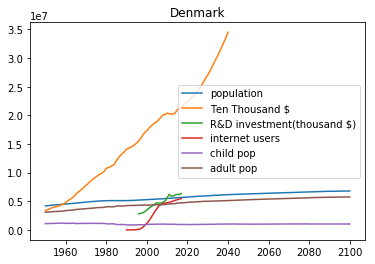

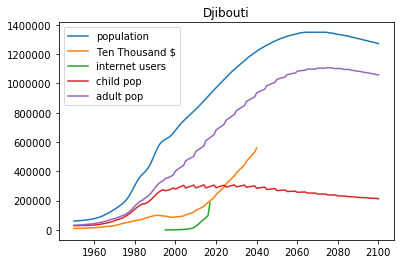

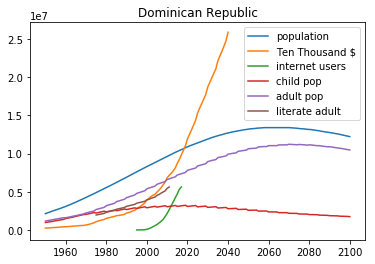

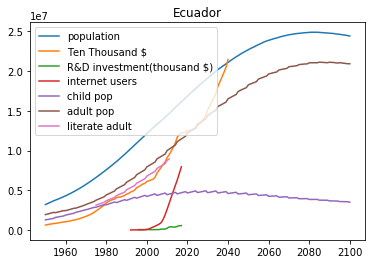

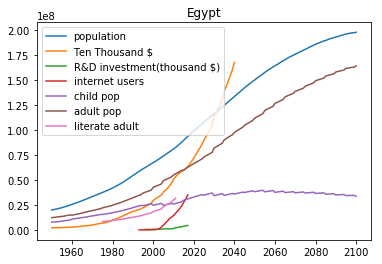

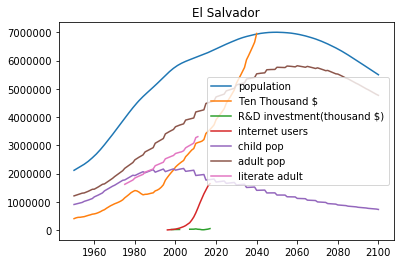

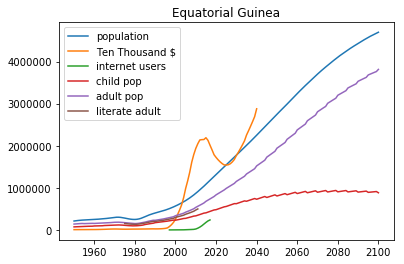

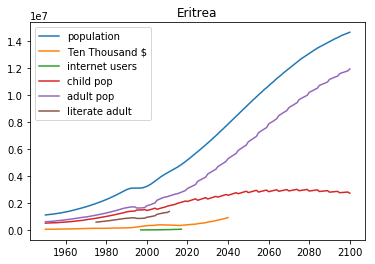

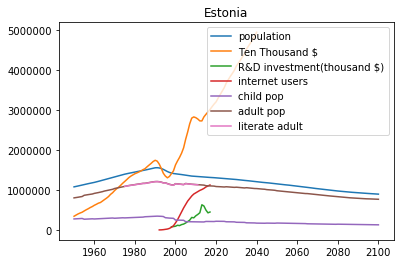

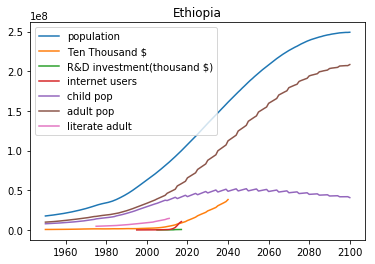

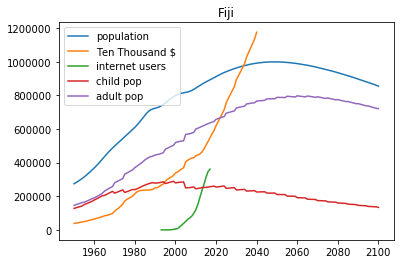

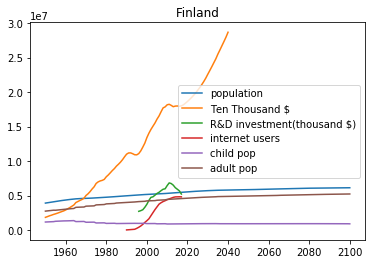

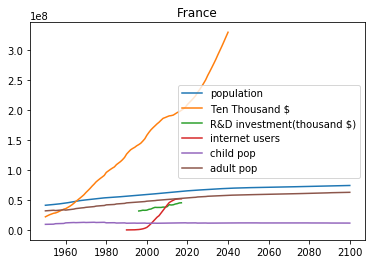

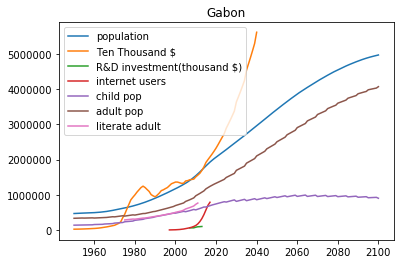

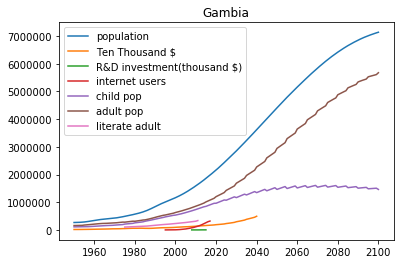

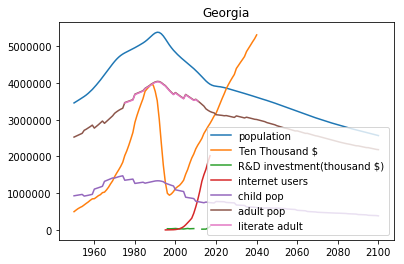

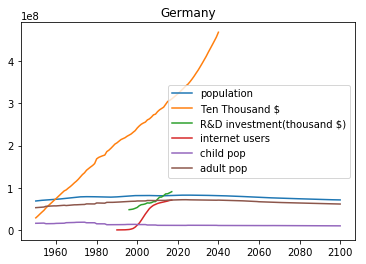

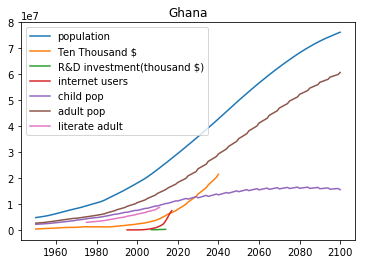

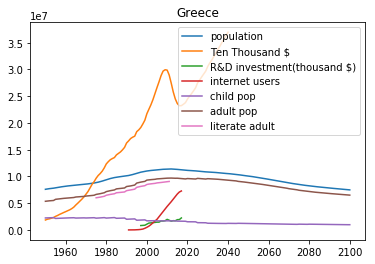

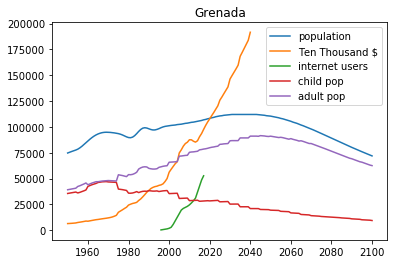

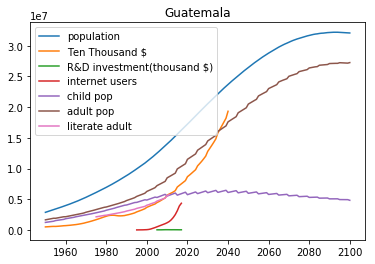

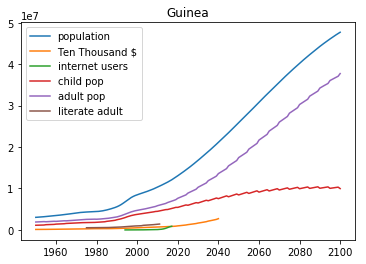

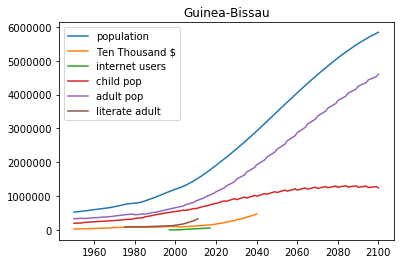

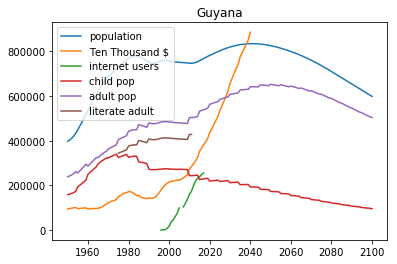

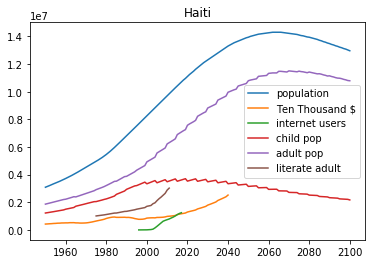

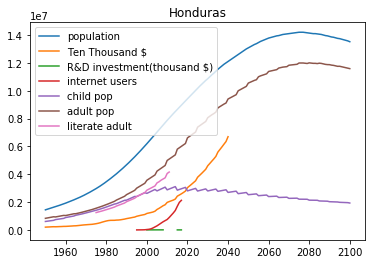

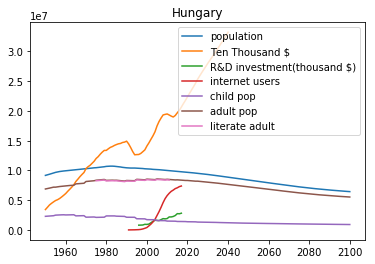

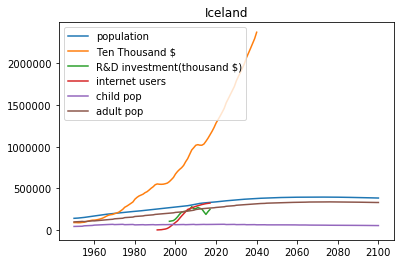

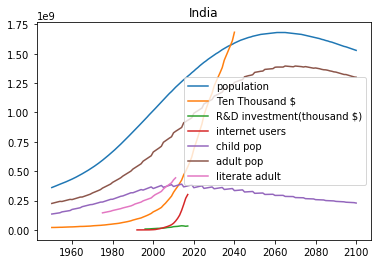

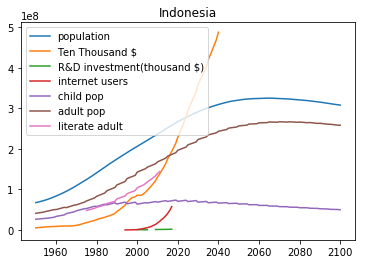

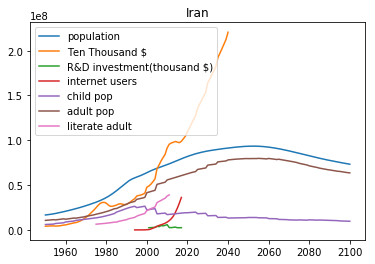

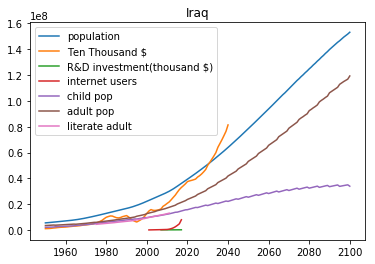

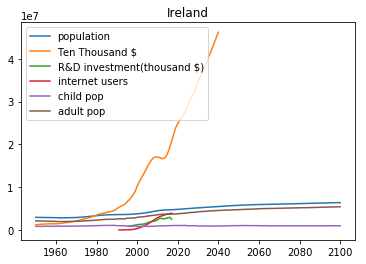

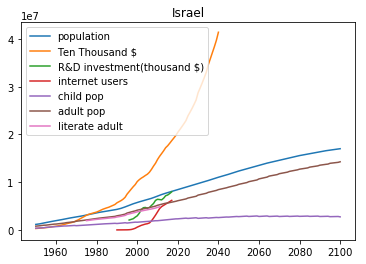

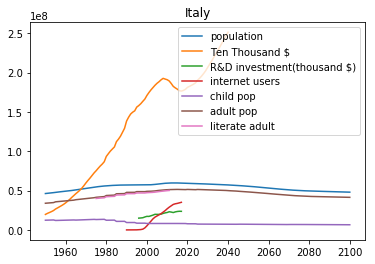

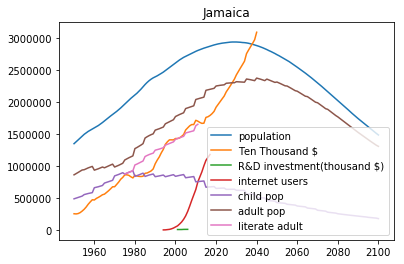

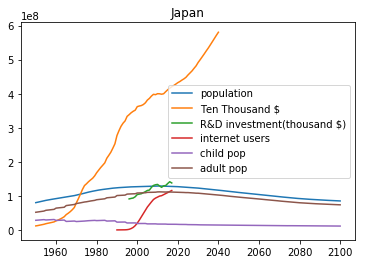

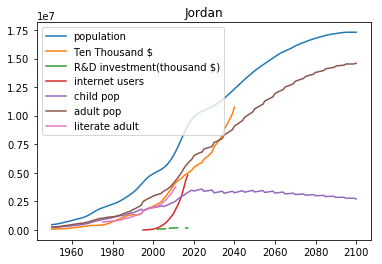

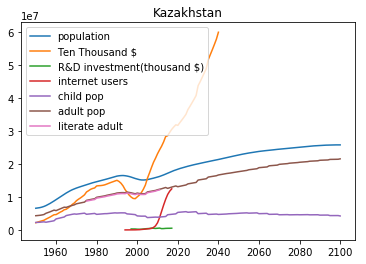

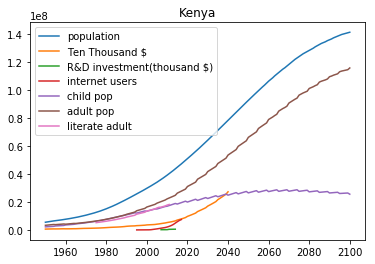

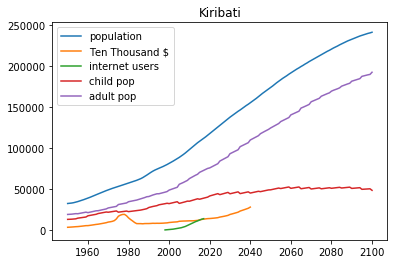

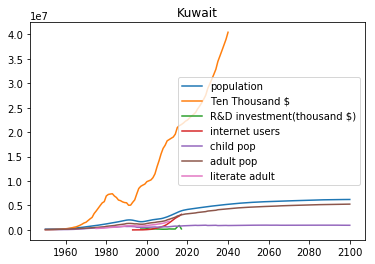

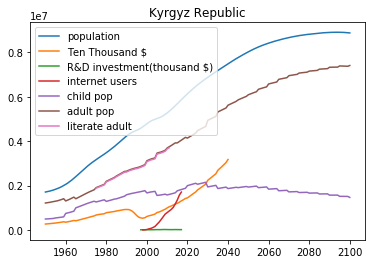

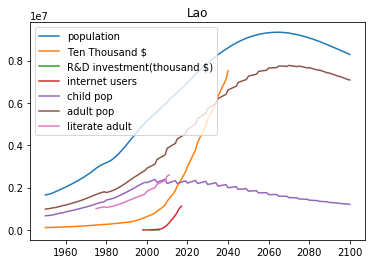

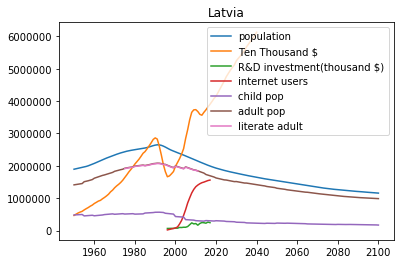

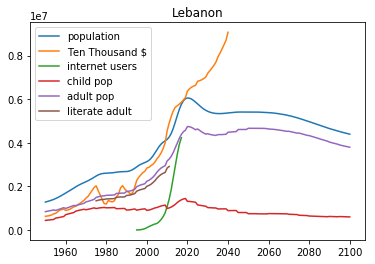

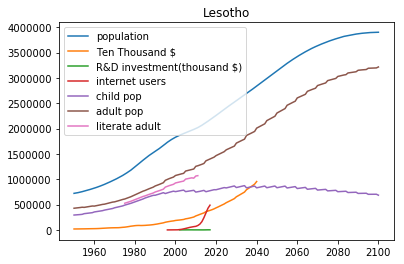

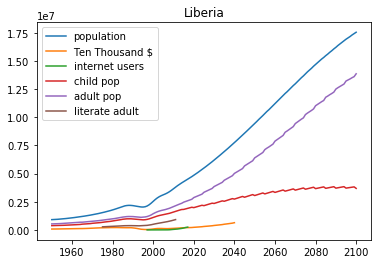

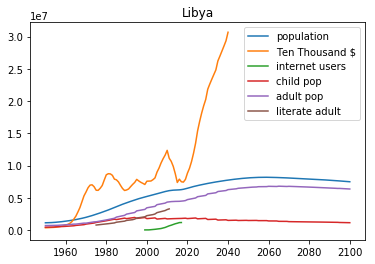

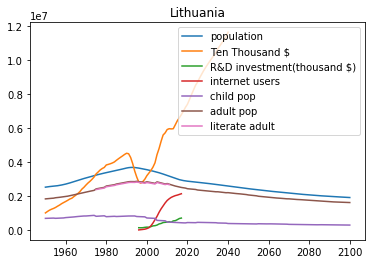

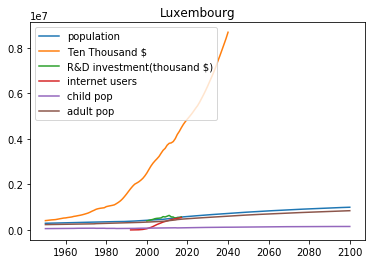

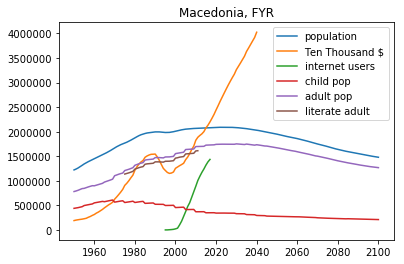

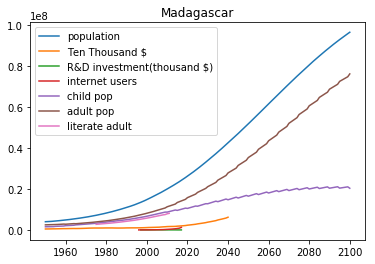

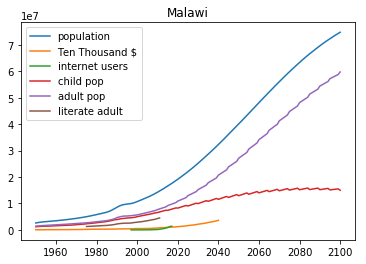

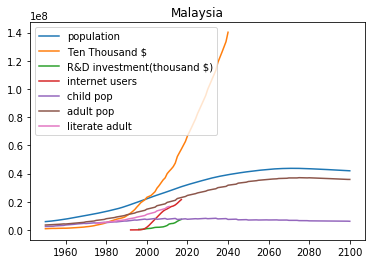

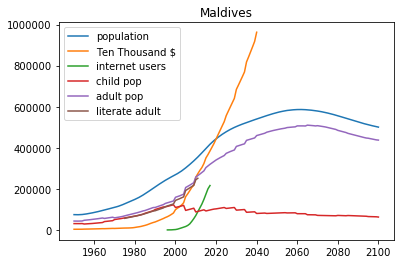

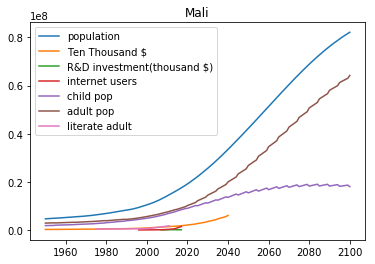

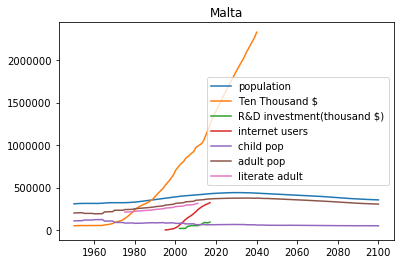

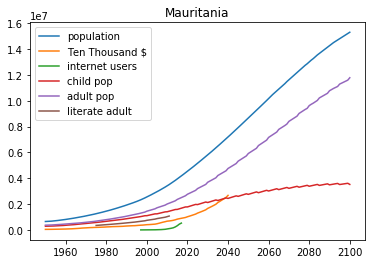

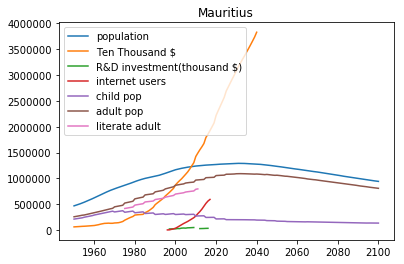

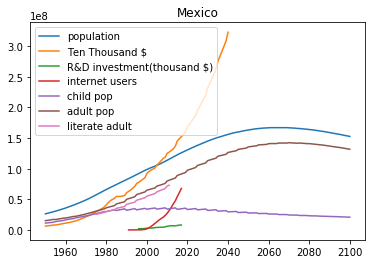

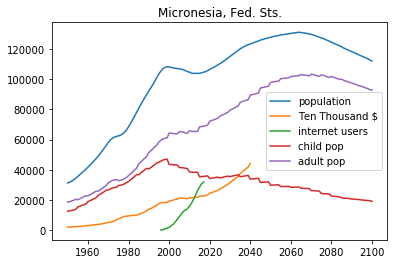

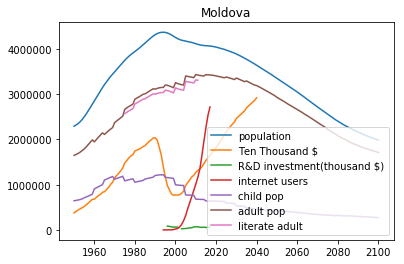

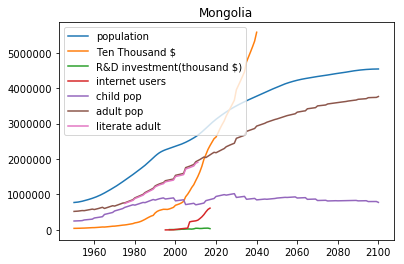

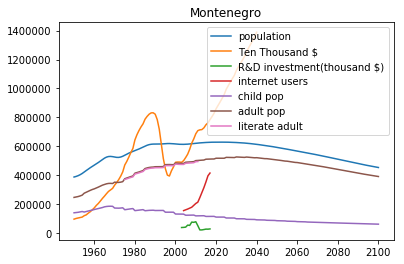

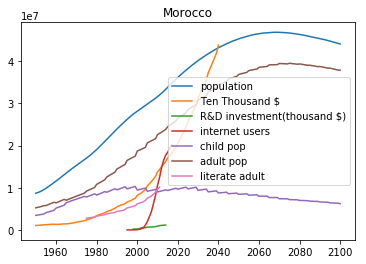

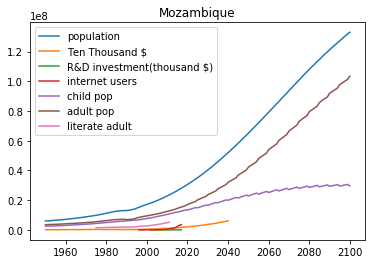

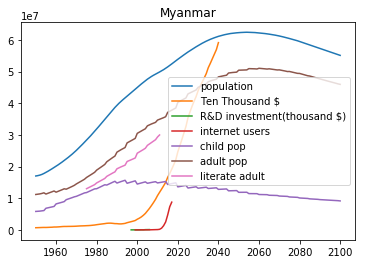

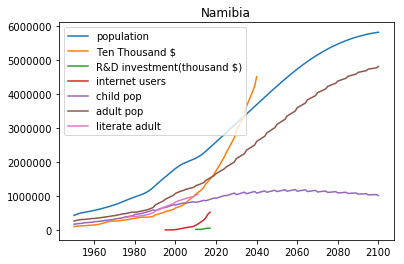

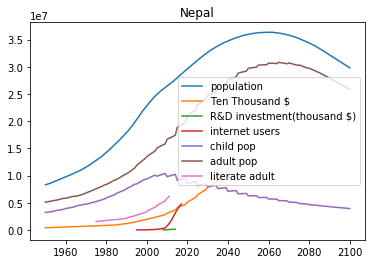

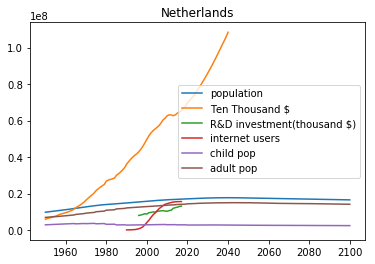

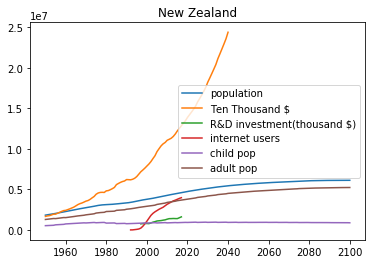

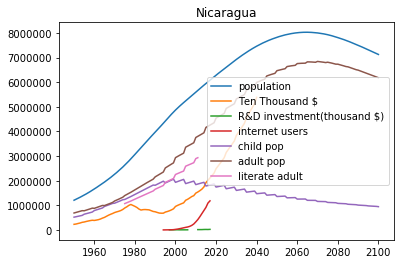

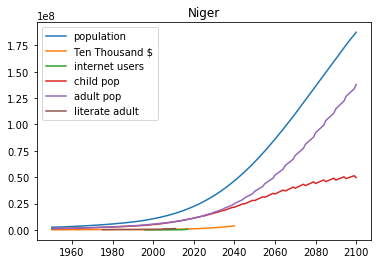

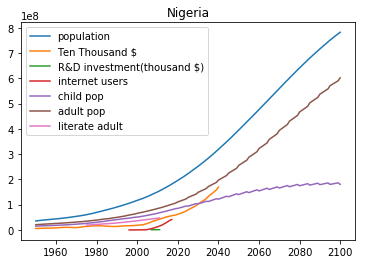

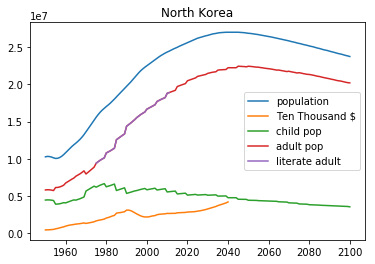

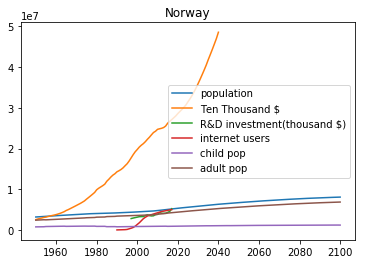

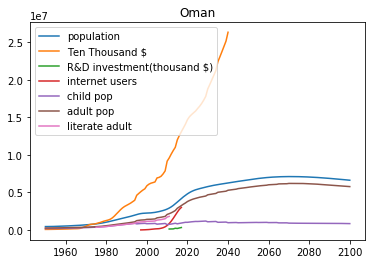

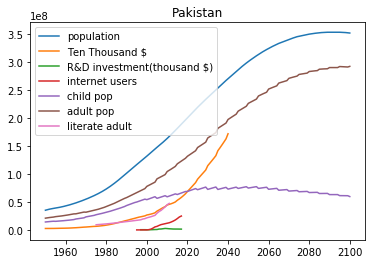

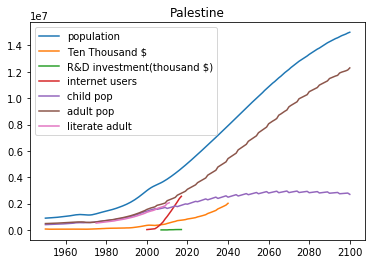

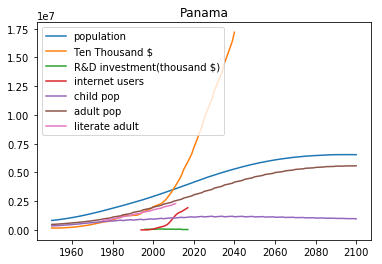

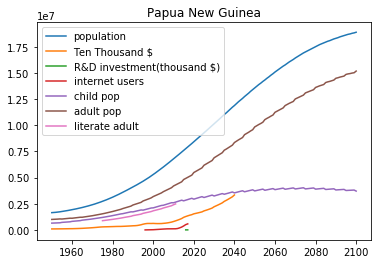

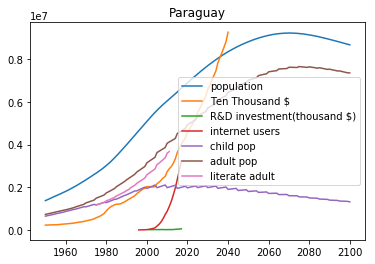

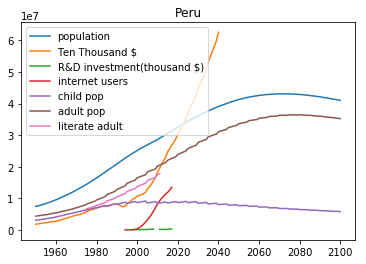

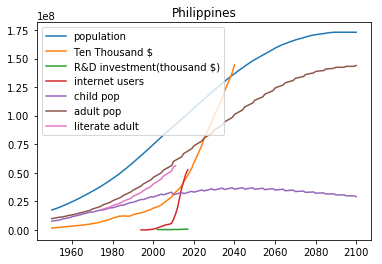

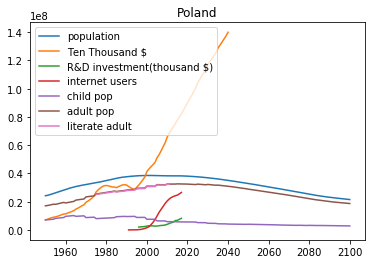

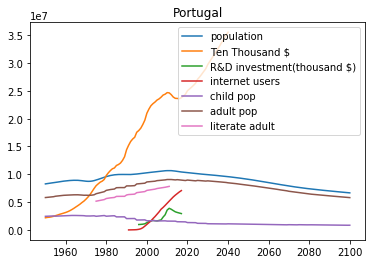

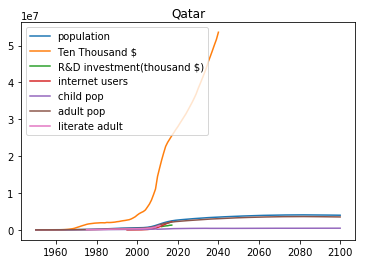

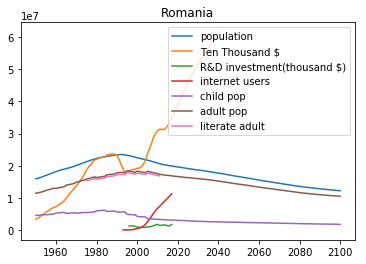

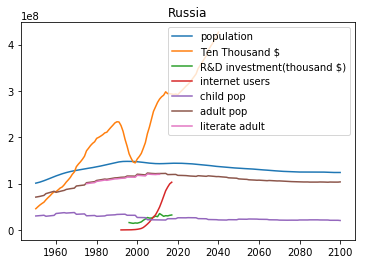

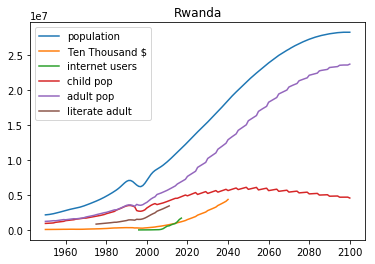

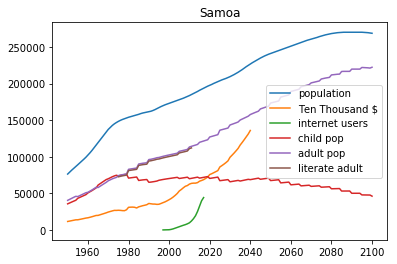

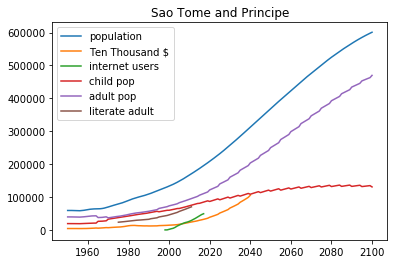

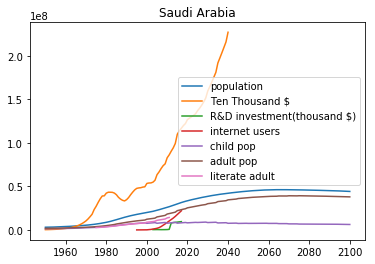

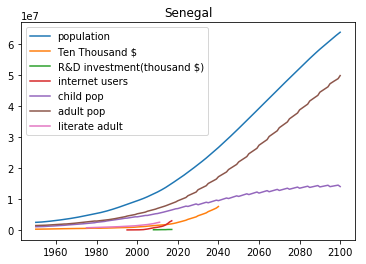

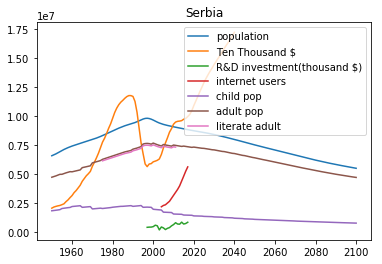

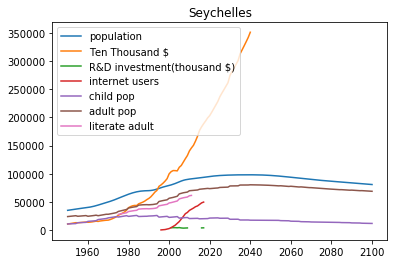

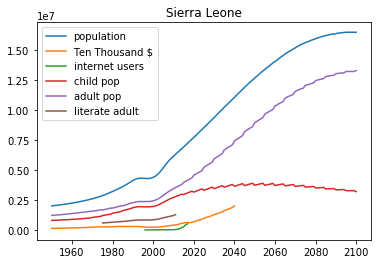

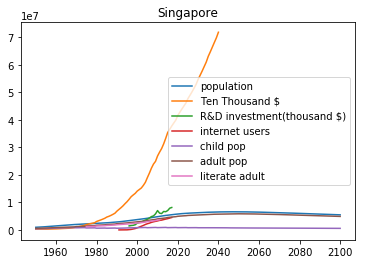

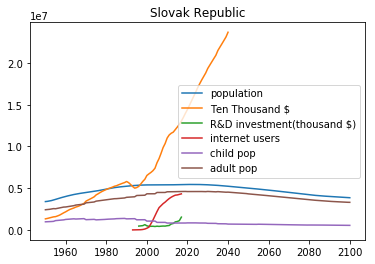

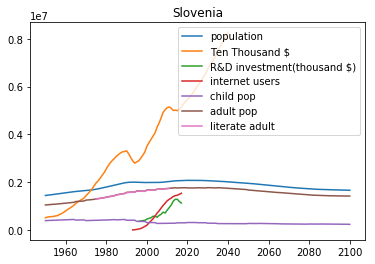

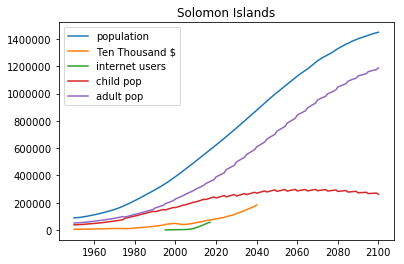

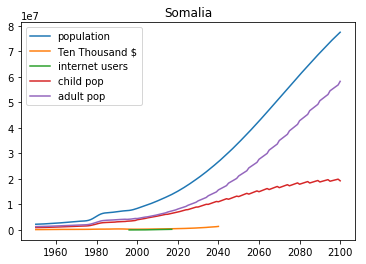

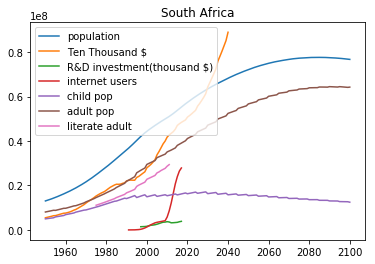

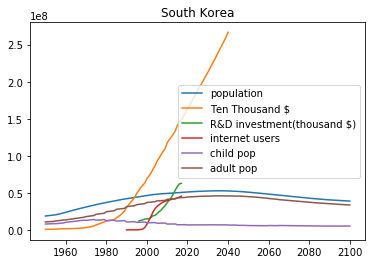

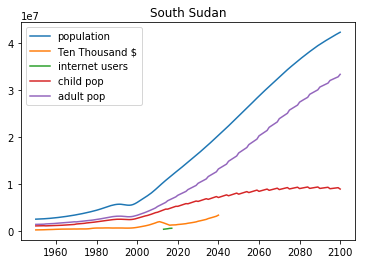

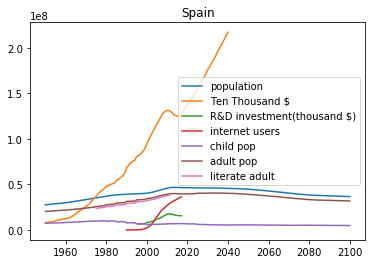

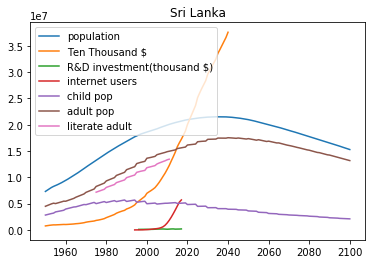

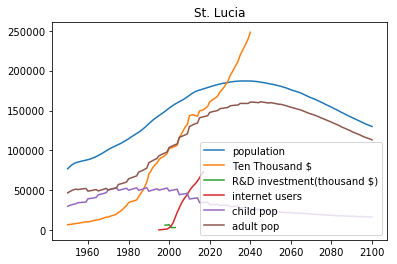

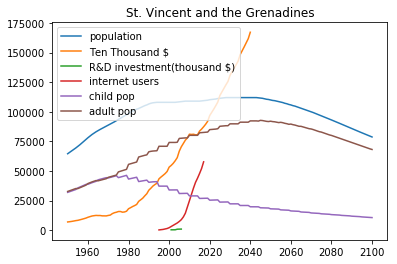

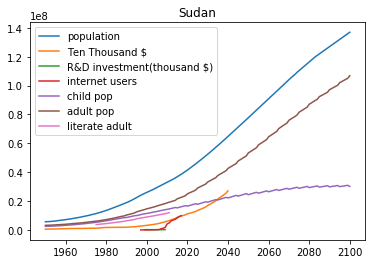

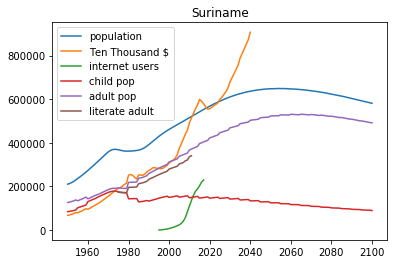

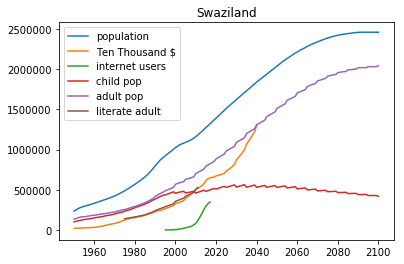

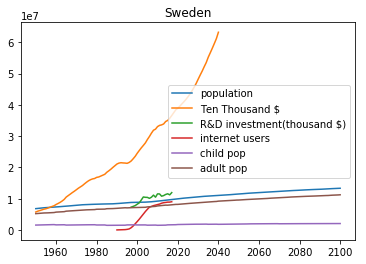

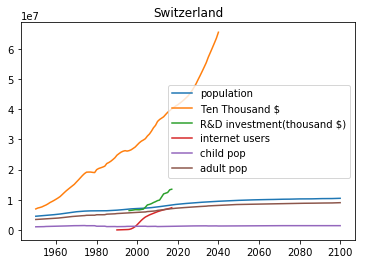

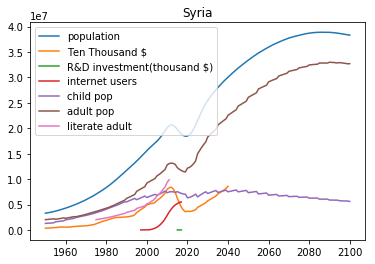

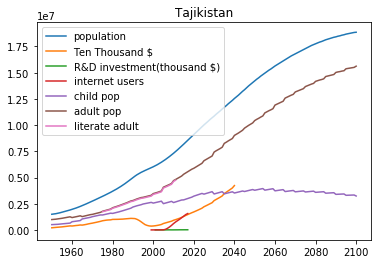

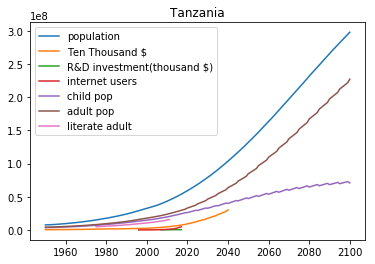

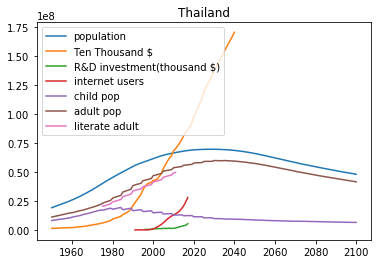

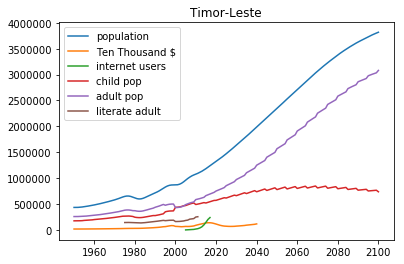

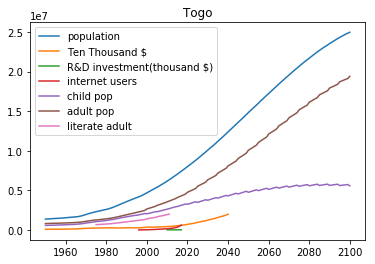

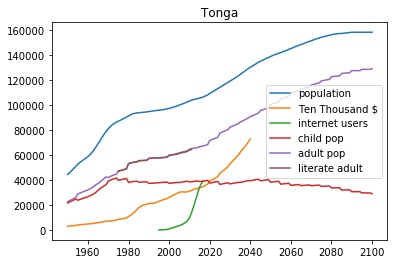

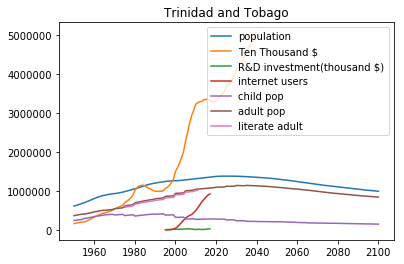

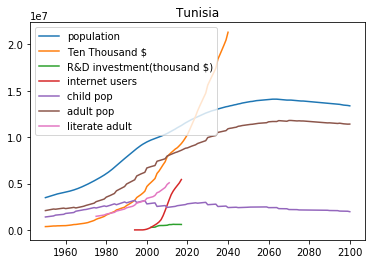

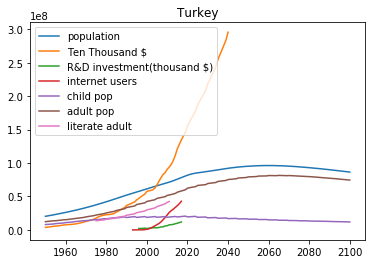

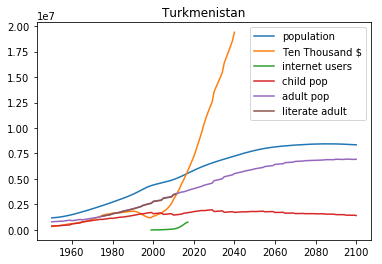

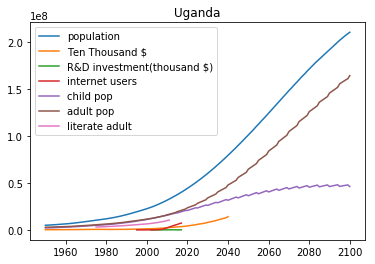

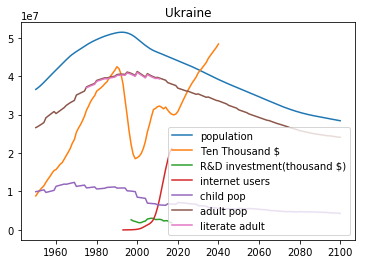

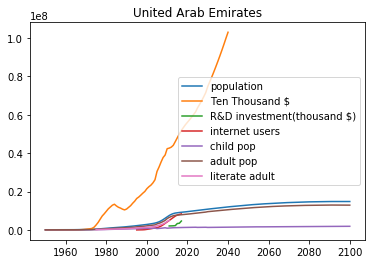

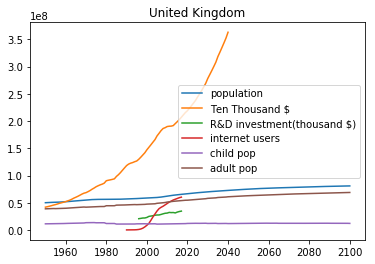

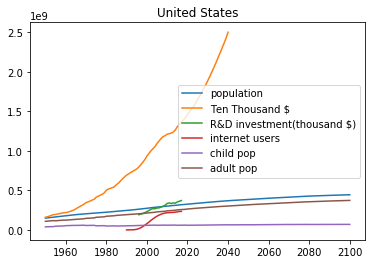

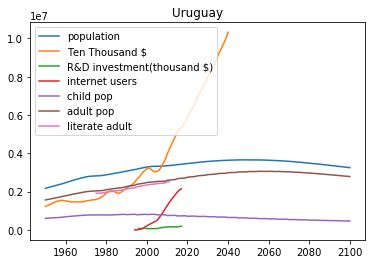

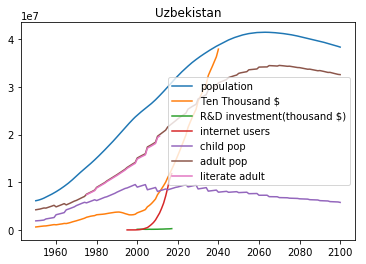

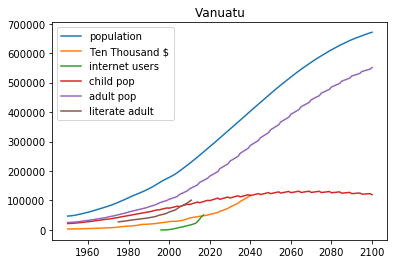

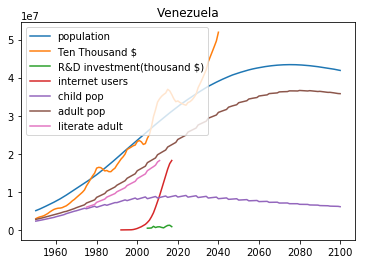

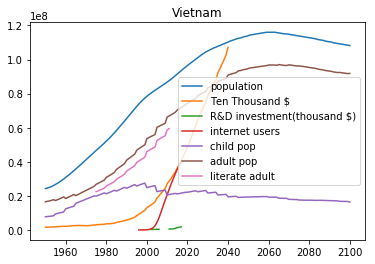

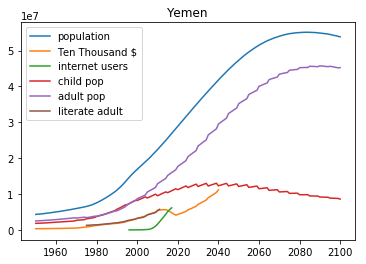

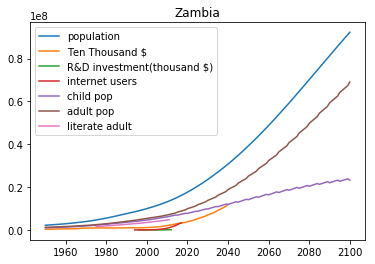

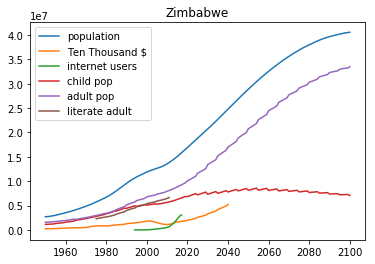

In [33]:
for column in pop_df.columns:
    plt.plot(pop_df[column], label='population')
    if column in gdp_df.columns:
        plt.plot(gdp_df[column]/10000, label='Ten Thousand $')
        if column in rd_df.columns:
            plt.plot(gdp_df[column]/1000*rd_df[column], label='R&D investment(thousand $)')
    if column in net_user_df.columns:
        plt.plot(net_user_df[column]/100*pop_df[column],label='internet users')
    if column in child_pop_df.columns:
        plt.plot(child_pop_df[column],label='child pop')
    if column in adult_pop_df.columns:
        plt.plot(adult_pop_df[column],label='adult pop')
        if column in lit_adult_df.columns:
            plt.plot(adult_pop_df[column]*lit_adult_df[column]/100, label='literate adult')
    plt.legend()
    plt.title(column)
    plt.show()